<a href="https://colab.research.google.com/github/JuyeongKime2/WebtoonTranslator/blob/main/%EC%9B%B9%ED%88%B0%EB%B2%88%EC%97%AD%EA%B8%B0_English_ver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:

!pip install -q paddlepaddle paddleocr

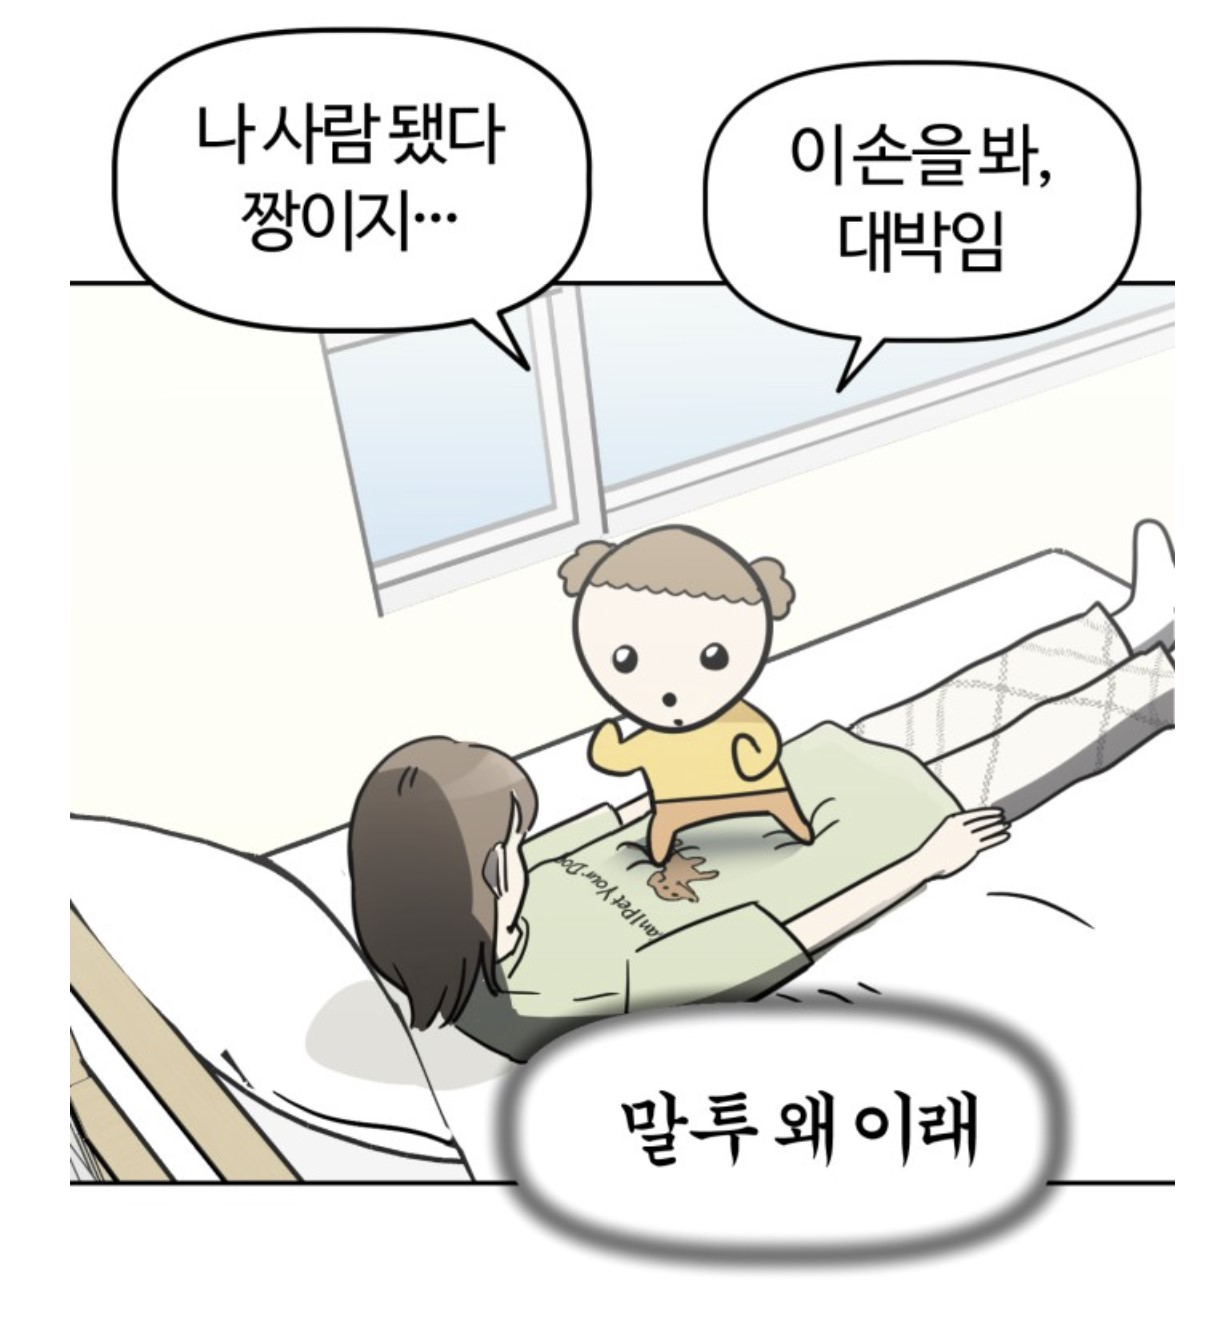

In [6]:
from PIL import Image
img = Image.open('/content/drive/MyDrive/webtoon1.jpg').convert('RGB')
img

# PaddleOCR은 OCR(Optical Character Recognition, 광학 문자 인식)을 수행하는 메인 클래스
주요 역할: 이미지에서 텍스트를 인식하는 기능을 제공. PaddleOCR 객체를 생성한 후, .ocr() 메서드를 호출하면 이미지 내의 텍스트를 탐지하고 인식하여 결과를 반환
# PaddleOCR 주요 파라미터
lang: 어떤 언어를 인식할지 설정할 수 있습니다. 예를 들어, 'korean'으로 설정하면 한국어 텍스트를 인식
ocr(): 이 메서드를 사용하여 이미지를 OCR 처리가 가능하고, 결과를 반환

In [7]:
from paddleocr import PaddleOCR, draw_ocr

# OCR 객체를 생성 (언어 설정: 한국어)
ocr = PaddleOCR(lang='korean')

# 지정된 이미지('/content/webtoon1.png')에서 OCR을 수행하여 결과 추출
# cls=False는 텍스트 방향(classification)을 고려하지 않겠다는 설정
result = ocr.ocr('/content/drive/MyDrive/webtoon1.jpg' , cls=True)
result #OCR 결과로, 이미지 속의 텍스트 위치와 추출된 텍스트 정보를 포함

[2024/09/25 14:04:30] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/korean/korean_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_tex

[[[[[196.0, 101.0], [503.0, 104.0], [503.0, 167.0], [196.0, 164.0]],
   ('나사람됐다', 0.9998686909675598)],
  [[[790.0, 122.0], [1048.0, 125.0], [1047.0, 189.0], [789.0, 186.0]],
   ('이손을봐', 0.9998542666435242)],
  [[[240.0, 190.0], [457.0, 190.0], [457.0, 254.0], [240.0, 254.0]],
   ('짱이지', 0.9374796748161316)],
  [[[836.0, 208.0], [1007.0, 208.0], [1007.0, 279.0], [836.0, 279.0]],
   ('대박임', 0.9996755719184875)],
  [[[620.0, 1088.0], [977.0, 1088.0], [977.0, 1171.0], [620.0, 1171.0]],
   ('말투왜이래', 0.9973255395889282)]]]

0.9994481801986694: 신뢰도 점수로, 이 값은 OCR이 해당 텍스트를 얼마나 정확하게 인식했다고 자신하는지를 나타냄. 1에 가까울수록 신뢰도가 높은 것

**약 99.94%의 확률로 이 텍스트가 정확하게 인식되었다고 판단**

In [8]:
result[0][0][1] #두 번째 좌표의 y값 출력

('나사람됐다', 0.9998686909675598)

In [9]:
boxdata = []  # 텍스트 박스 좌표를 저장할 빈 리스트 생성

# OCR 결과에서 각 텍스트 박스를 순회
for temp in result[0]:
    # 각 텍스트 박스의 좌표 데이터를 추출하여 boxdata 리스트에 추가
    boxdata.append(temp[0])


In [10]:
textdata = []  # 인식된 텍스트를 저장할 빈 리스트 생성
scoredata = []  # 신뢰도(Confidence Score)를 저장할 빈 리스트 생성

# OCR 결과에서 각 텍스트 블록을 순회
for temp in result[0]:
    # temp[1][0]은 인식된 텍스트를 의미하므로 textdata 리스트에 추가
    textdata.append(temp[1][0])

    # temp[1][1]은 신뢰도 점수(Confidence Score)를 의미하므로 scoredata 리스트에 추가
    scoredata.append(temp[1][1])


**scikit-learn**은 다양한 머신러닝 알고리즘과 도구를 제공하며, 분류, 회귀, 클러스터링, 차원 축소, 모델 선택, 전처리 등 다양한 작업에 사용

In [11]:
!pip install scikit-learn

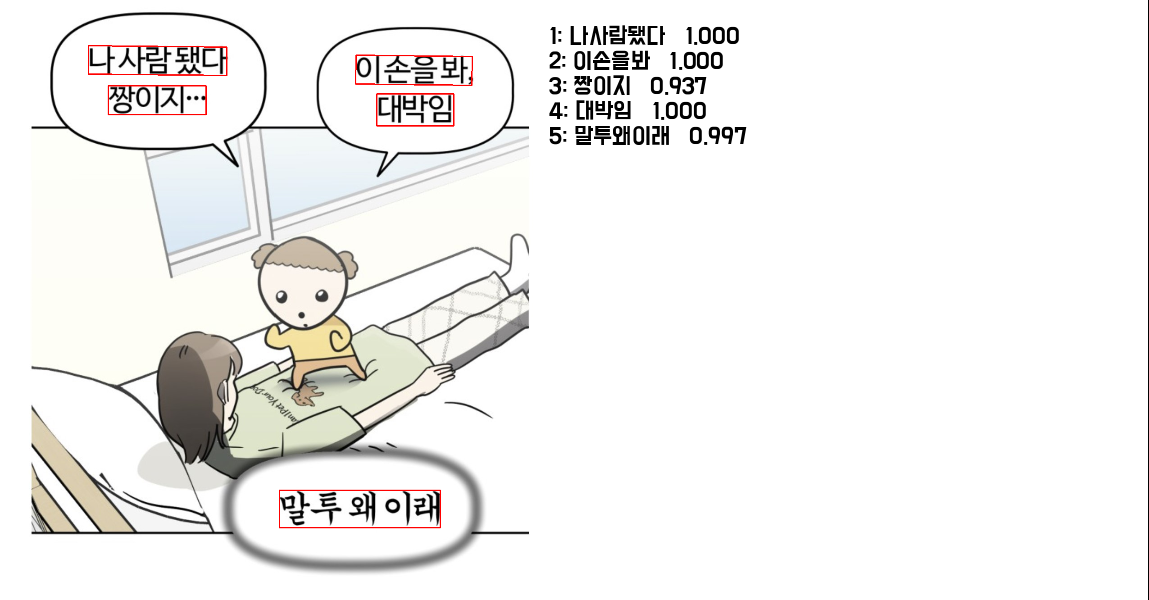

In [12]:
# OCR 결과를 이미지에 그리는 함수 호출
result_np = draw_ocr(img, boxdata, textdata, scoredata, font_path='/content/drive/MyDrive/BMDOHYEON.ttf')

# 그려진 이미지를 PIL Image 객체로 변환
Image.fromarray(result_np)

* boxdata는 OCR (Optical Character Recognition) 결과에서 검출된 각 텍스트 영역의 경계 상자 좌표를 저장하는 리스트

* 각 텍스트 영역의 경계 상자는 일반적으로 좌상단 좌표와 우하단 좌표로 표현되며, boxdata 리스트는 각 텍스트 영역에 대한 좌표를 다음과 같은 형식으로 저장

In [13]:
boxdata

[[[196.0, 101.0], [503.0, 104.0], [503.0, 167.0], [196.0, 164.0]],
 [[790.0, 122.0], [1048.0, 125.0], [1047.0, 189.0], [789.0, 186.0]],
 [[240.0, 190.0], [457.0, 190.0], [457.0, 254.0], [240.0, 254.0]],
 [[836.0, 208.0], [1007.0, 208.0], [1007.0, 279.0], [836.0, 279.0]],
 [[620.0, 1088.0], [977.0, 1088.0], [977.0, 1171.0], [620.0, 1171.0]]]

## DBSCAN의 주요 특징:

* **밀도 기반**: 데이터 포인트의 밀도에 따라 군집을 형성하며, 밀도가 높은 지역을 군집으로 간주(밀집된 점들끼리 모임)
* **비구형 군집 탐지**: DBSCAN은 비구형(비원형) 군집을 잘 찾아낼 수 있음.(모양에 구애받지 않음)
* **노이즈 처리**: 밀도가 낮은 영역에 있는 데이터 포인트는 노이즈로 간주하고 군집에서 제외합니다.(외딴 점은 버림: 혼자 떨어진 점은 노이즈로 취급해 무시.)
* **사전 군집 개수 불필요**: 군집의 개수를 사전에 설정할 필요가 없음.
(군집 개수 미리 몰라도 됨)


In [14]:
import numpy as np
from sklearn.cluster import DBSCAN

box_point_data = [] # 텍스트 박스의 정보를 저장할 리스트 생성

# boxdata 리스트의 각 텍스트 박스 정보를 순회
for temp in boxdata:
    x1,y1 = temp[0] # 텍스트 박스 좌상단 좌표 (x1, y1)
    x2,y2 = temp[2] # 텍스트 박스 우하단 좌표 (x2, y2)

    w = x2-x1 # 텍스트 박스 너비 계산
    h = y2-y1 # 텍스트 박스 높이 계산

    # 텍스트 박스 정보 (좌상단 x, 좌상단 y, 너비, 높이)를 box_point_data 리스트에 추가
    box_point_data.append([ int(x1),int(y1),int(w), int(h)])

box_point_data # box_point_data 리스트 출력


[[196, 101, 307, 66],
 [790, 122, 257, 67],
 [240, 190, 217, 64],
 [836, 208, 171, 71],
 [620, 1088, 357, 83]]

In [15]:
import numpy as np
from sklearn.cluster import DBSCAN

# 박스(box)의 중심 좌표를 계산하는 함수
def point_center(box):
    """
    주어진 박스의 중심 좌표를 계산하는 함수.

    Args:
    box (list): [x, y, width, height]로 구성된 박스 좌표.

    Returns:
    np.array: [center_x, center_y]로 구성된 중심 좌표.
    """
    # 중심 x 좌표 = 왼쪽 x 좌표 + 너비 / 2
    center_x = box[0] + box[2] / 2
    # 중심 y 좌표 = 상단 y 좌표 + 높이 / 2
    center_y = box[1] + box[3] / 2

    # 중심 좌표를 배열로 반환
    return np.array([center_x, center_y])

# 주어진 박스 좌표들을 클러스터링하는 함수
def cluster_boxes(boxes, eps):
    """
    주어진 박스들의 중심 좌표를 계산한 후, DBSCAN을 사용해 군집화(클러스터링)하는 함수.

    Args:
    boxes (list): 여러 개의 박스 좌표 (각각이 [x, y, width, height] 형태).
    eps (float): DBSCAN 알고리즘의 epsilon 값. 점 간의 최대 거리 기준.

    Returns:
    list: 군집화된 결과. 각 군집은 해당 군집에 속한 박스 인덱스 리스트로 반환됨.
    """
    # 각 박스의 중심 좌표를 계산하여 배열로 저장
    center = np.array([point_center(box) for box in boxes])

    # DBSCAN 알고리즘으로 군집화 수행
    # eps는 군집의 최대 반경을 설정하는 매개변수, min_samples=1은 최소 샘플 개수를 의미
    clustering = DBSCAN(eps=eps, min_samples=1).fit(center)

    # 군집화 결과에서 레이블 추출 (같은 레이블은 같은 군집에 속함)
    labels = clustering.labels_

    # 군집 결과를 저장할 딕셔너리
    clusters = {}

    # 각 박스의 레이블에 따라 군집에 추가
    for i, label in enumerate(labels):
        # 이미 해당 레이블이 있으면 해당 인덱스를 리스트에 추가
        if label in clusters:
            clusters[label].append(i)
        # 새로운 레이블이면 새로운 리스트로 추가
        else:
            clusters[label] = [i]

    # 군집 결과 출력 (디버깅용)
    print(clusters)

    # 군집 리스트만 반환 (딕셔너리의 값들만 리스트로 변환)
    return list(clusters.values())

# 예시 데이터에 대해 군집화 수행
# box_point_data는 [x, y, width, height]로 구성된 박스들의 리스트
# eps는 점 간의 최대 거리 기준
cluster_result = cluster_boxes(box_point_data, 120)


{0: [0, 2], 1: [1, 3], 2: [4]}


In [16]:
textdata

['나사람됐다', '이손을봐', '짱이지', '대박임', '말투왜이래']

In [17]:
# document_result를 저장할 빈 리스트 생성
document_result = []

# cluster_result는 각 군집에 속한 텍스트 데이터의 인덱스를 가진 리스트
# 각 군집에 대해 루프를 수행
for temp in cluster_result:
    # 각 군집의 텍스트를 저장할 임시 문자열 초기화
    text_temp = ''

    # 군집에 속한 단어 인덱스에 대해 루프 수행
    for word_index in temp:
        # 각 인덱스에 해당하는 단어를 textdata에서 찾아서 text_temp에 추가
        text_temp = text_temp + textdata[word_index] + ' '

    # 군집별로 연결된 텍스트를 document_result 리스트에 추가
    document_result.append(text_temp)

# 최종적으로 군집별로 연결된 텍스트가 담긴 document_result 출력
document_result


['나사람됐다 짱이지 ', '이손을봐 대박임 ', '말투왜이래 ']

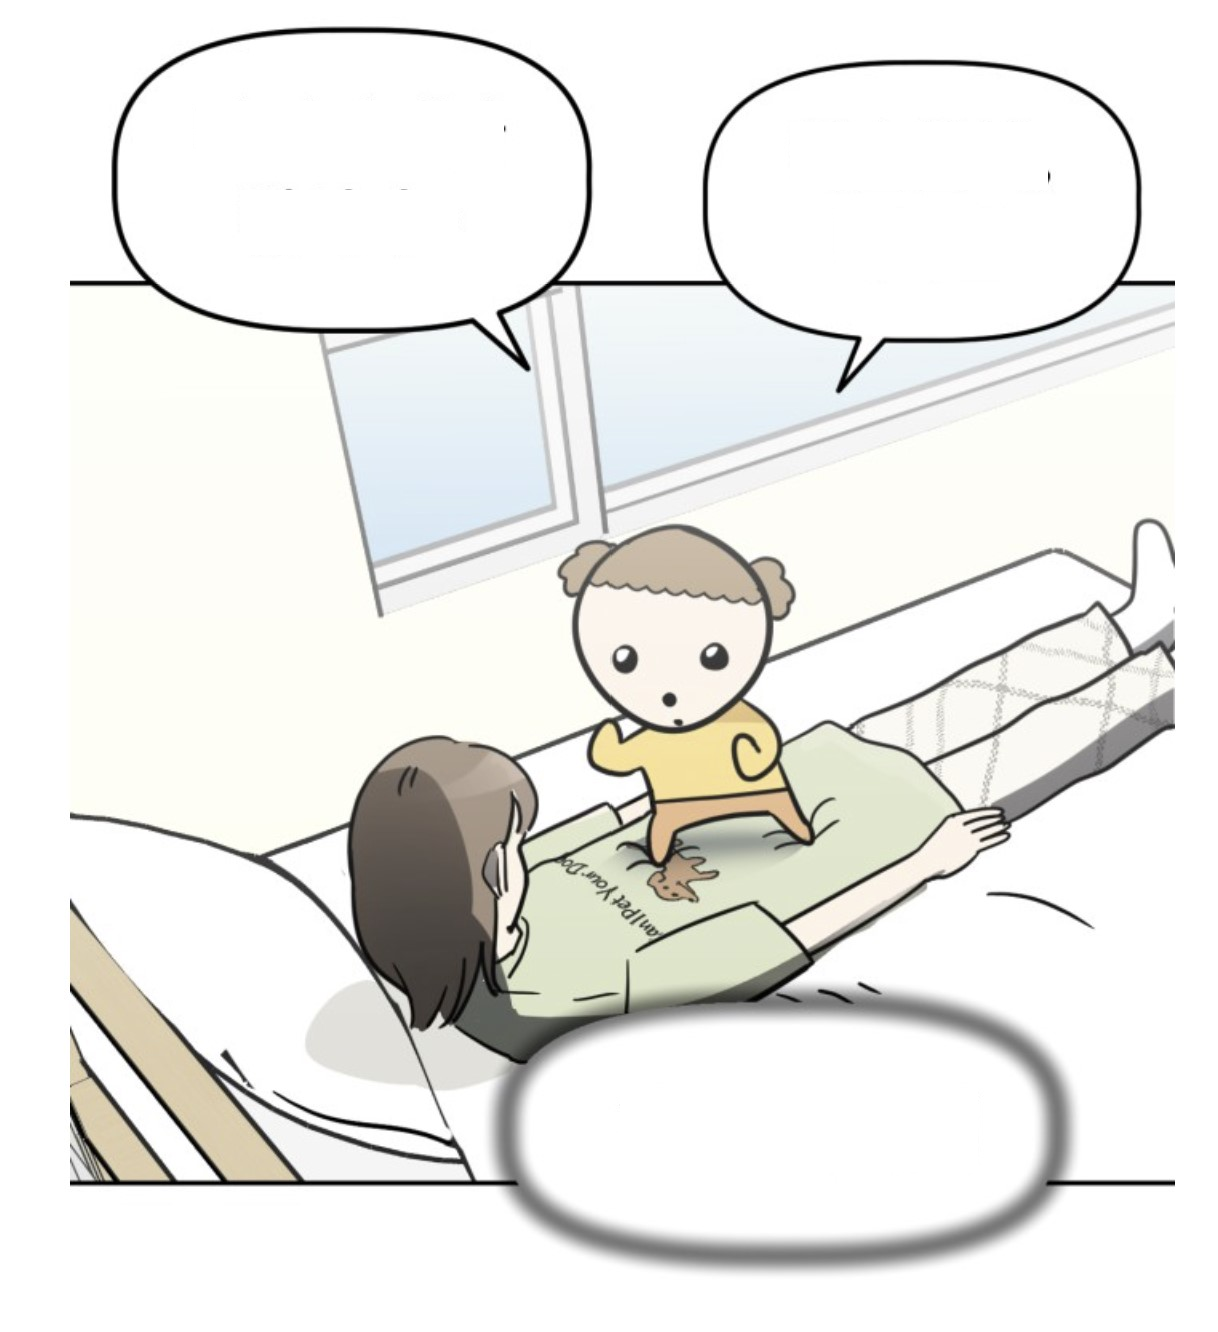

In [18]:
from PIL import ImageDraw

# 이미지를 복사하여 새 이미지 생성
new_img = img.copy()

# 복사된 이미지 위에 그릴 수 있는 객체 생성
draw = ImageDraw.Draw(new_img)

# box_point_data 리스트에서 각 박스의 좌표 정보를 이용해 사각형을 그림
for box in box_point_data:
    # 박스 좌표 추출 (x1, y1: 좌상단 좌표, w: 너비, h: 높이)
    x1, y1, w, h = box

    # 우하단 좌표 계산 (x2, y2)
    x2 = x1 + w
    y2 = y1 + h

    # 박스의 좌상단(x1, y1)과 우하단(x2, y2) 좌표로 사각형 그리기
    # 'outline'은 테두리 색상, 'fill'은 내부 색상 지정
    # 여기서는 흰색으로 채운 사각형을 그리도록 설정됨
    draw.rectangle([x1, y1, x2, y2], outline='white', fill='white')

# 사각형이 그려진 새로운 이미지를 반환
new_img


In [19]:
!pip install httpcore==0.15.0 httpx pymongo googletrans

In [20]:
!pip install translate

### 시행착오
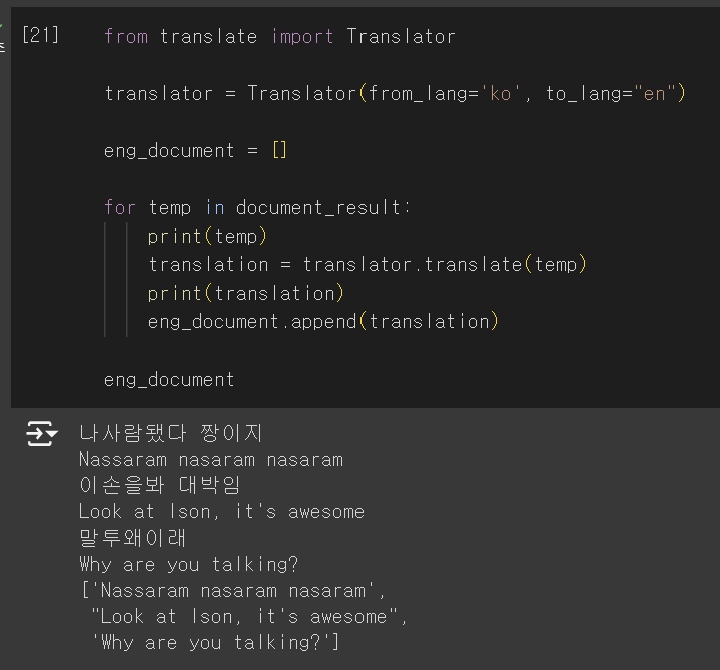

* 번역 결과가 부정확

* translate 라이브러리의 한계를 해결하기 위해, 번역이 부정확하게 이루어진 경우 직접 번역을 제공하는 방식으로 처리

* 번역된 단어와 원래 단어를 함께 활용:
to_playful_tone 함수에서 번역된 결과(translation)뿐만 아니라 원래 문장(original)도 조건에 사용.
* 번역 결과가 부정확하거나 원래 문장을 기준으로 더 나은 변환을 할 수 있을 경우, 원래 문장에 포함된 단어를 기반으로 적절한 영어 번역을 출력

In [33]:
from translate import Translator

# 번역기 설정
translator = Translator(from_lang='ko', to_lang="en")

# 예제 문장 리스트
document_result = ["나사람됐다 짱이지", "이손을봐 대박임", "말투왜이래"]

# 번역된 문장들을 저장할 리스트
eng_document = []

# 장난스러운 말투로 변환 함수
def to_playful_tone(original, translation):
    if "person" in translation or "사람됐다" in original:
        return "I became a person, it's super cool."
    elif "Look at" in translation or "손을봐" in original:
        return "Look at my hand, it's awesome."
    elif "talking" in translation or "말투왜이래" in original:
        return "What's wrong with your way of speaking."  # 20대 여자의 말투 반영
    return translation

# 번역 루프
for temp in document_result:
    try:
        print(f"Original: {temp}")

        # 번역
        translation = translator.translate(temp)
        print(f"Translated: {translation}")

        # 장난스러운 말투로 변환
        playful_translation = to_playful_tone(temp, translation)
        print(f"Playful Translated: {playful_translation}")

        eng_document.append(playful_translation)
    except Exception as e:
        print(f"Error translating {temp}: {e}")

# 결과 출력
print(eng_document)


Original: 나사람됐다 짱이지
Translated: Nassaram nasaram nasaram
Playful Translated: I became a person, it's super cool.
Original: 이손을봐 대박임
Translated: Look at Ison, it's awesome
Playful Translated: Look at my hand, it's awesome.
Original: 말투왜이래
Translated: Why are you talking?
Playful Translated: What's wrong with your way of speaking.
["I became a person, it's super cool.", "Look at my hand, it's awesome.", "What's wrong with your way of speaking."]


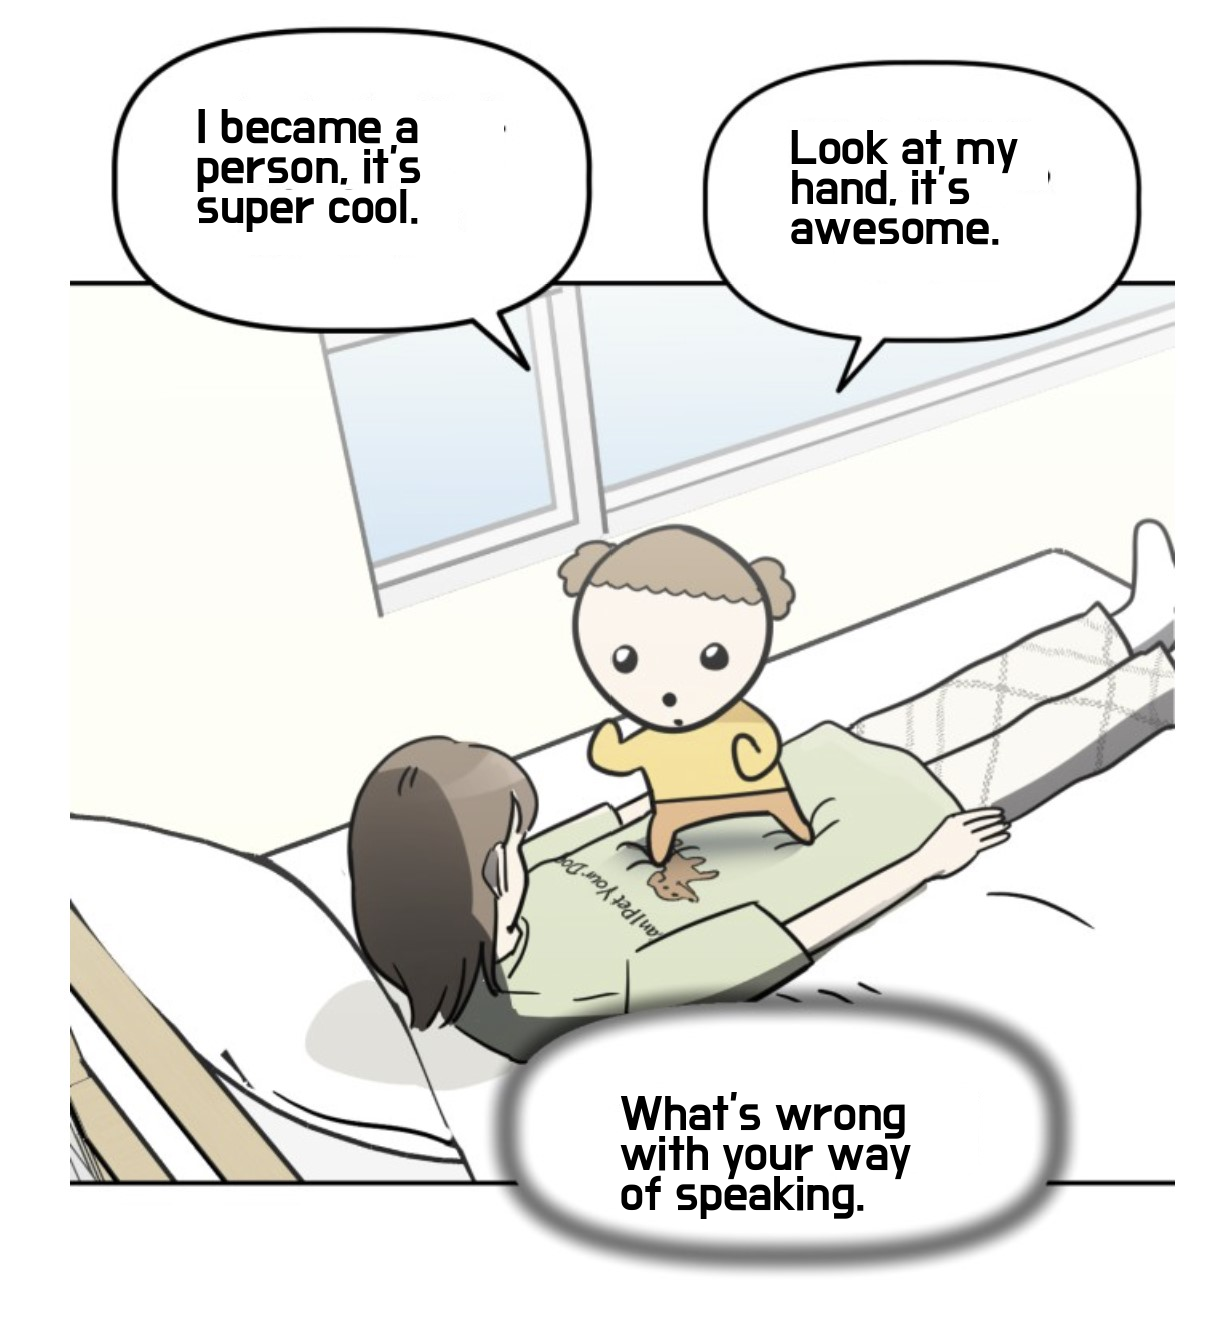

In [121]:
import textwrap
from PIL import ImageFont

new_eng_img = new_img.copy()

draw = ImageDraw.Draw(new_eng_img)
font = ImageFont.truetype("/content/drive/MyDrive/BMDOHYEON.ttf",40)

for index,eng_text in enumerate(eng_document):
    text_en = textwrap.wrap(eng_text, width=15)

    font_height = 40
    line_height = 0.1* font_height

    start_index = cluster_result[index][0]  #0

    for text in text_en:
        text_position = box_point_data[start_index][0], box_point_data[start_index][1] + line_height
        draw.text(text_position, text, font=font, fill='black')
        line_height += font_height


new_eng_img